In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import json

from collections import Counter

label_v9 = "Fluent UI react-components (v9)"
label_epic = "Type: Epic"
label_soft_close = "Resolution: Soft Close"
label_needs_backlog_grooming = "Needs: Backlog review"
label_parter_ask = "Partner Ask"
label_needs_triage = "Needs: Triage :mag:"

issues_data = "2024-05"
json_file = open(f"data/{issues_data}/issues.json")

all_issues = [issue for issue in json.load(json_file) if "pull_request" not in issue]

issues_minimal = []

for issue in all_issues:
    labels_set = set([label["name"] for label in issue["labels"]])

    issues_minimal.append(
        {
            "id": issue["id"],
            "title": issue["title"],
            "labels": labels_set,
            "created_at": issue["created_at"],
            "state": issue["state"].lower(),
        }
    )

popover_issues = [
    issue
    for issue in issues_minimal
    if "Component: Popover" in issue["labels"] and issue["state"] == "open"
]

df_issues_all = pd.DataFrame(issues_minimal)
df_issues_all["created_at"] = pd.to_datetime(df_issues_all["created_at"], yearfirst=True)

df_issues = pd.DataFrame(
    [issue for issue in issues_minimal if issue["state"] == "open"]
)
df_issues["created_at"] = pd.to_datetime(df_issues["created_at"], yearfirst=True)

df_issues_closed = pd.DataFrame(
    [issue for issue in issues_minimal if issue["state"] == "closed"]
)
df_issues_closed["created_at"] = pd.to_datetime(
    df_issues_closed["created_at"], yearfirst=True
)

len(all_issues)

1836

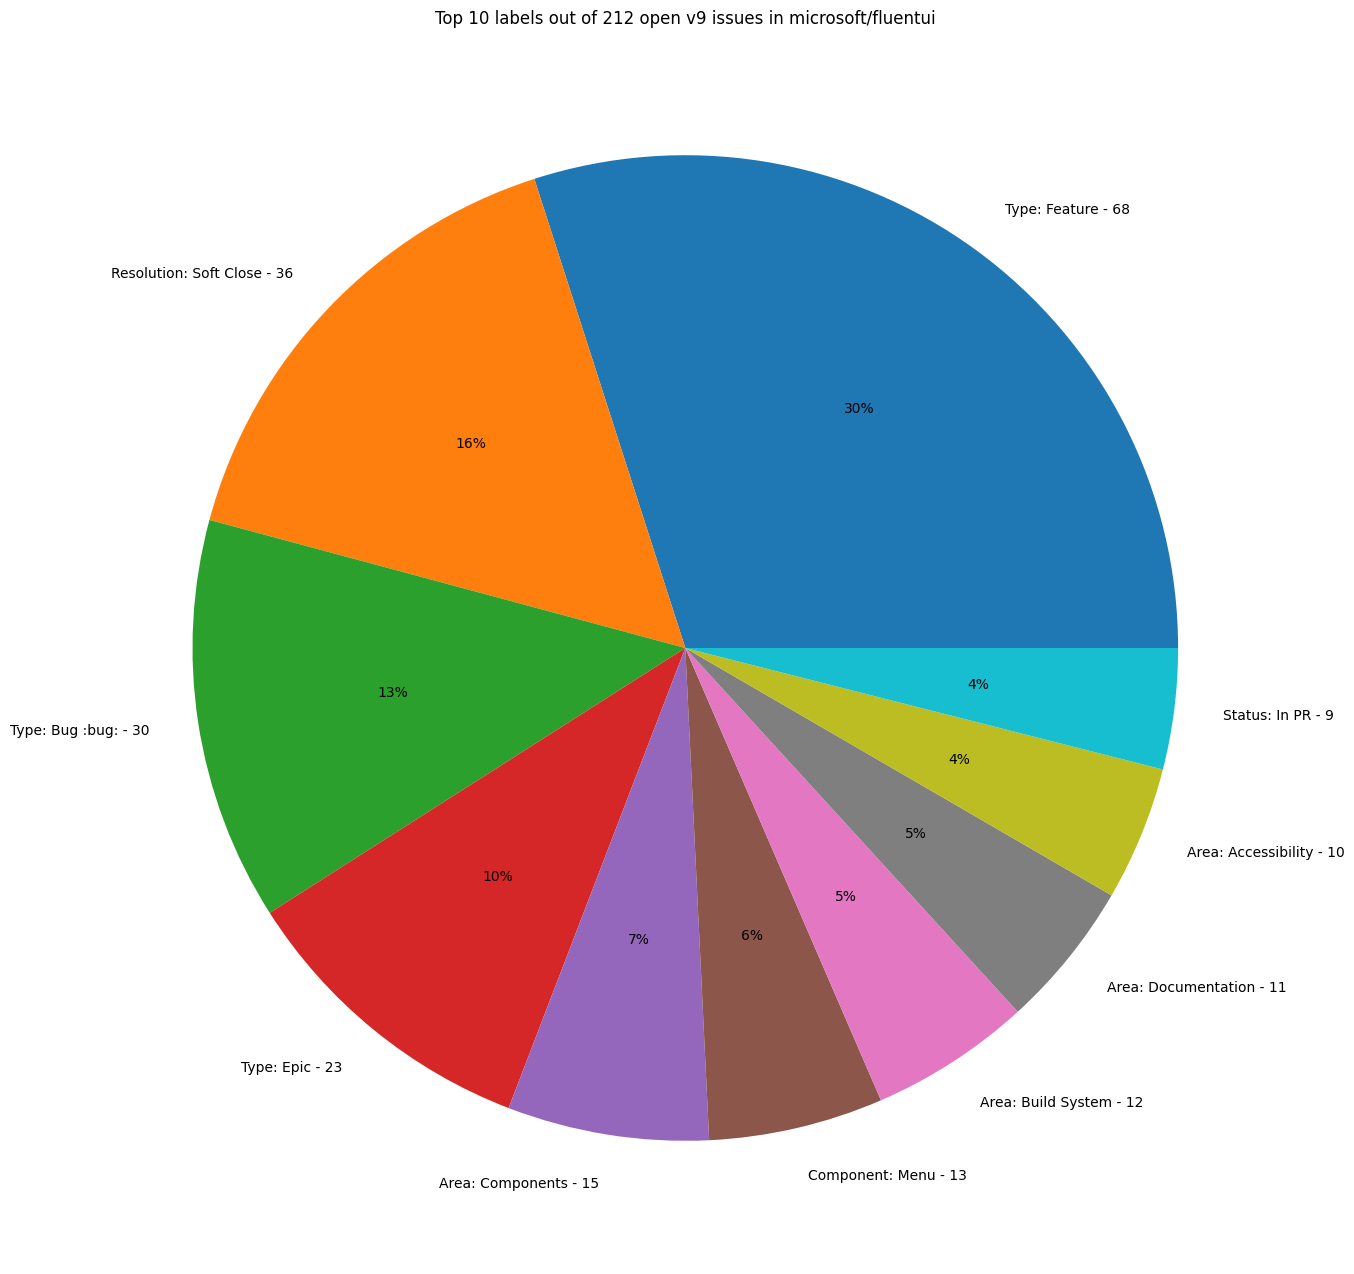

In [14]:
issue_labels = [issue["labels"] for issue in issues_minimal if issue["state"] == "open"]
labels_counter = Counter()
no_go_labels = set([label_v9])

for labels in issue_labels:
    for label in labels:
        if label in no_go_labels:
            continue

        labels_counter.update([label])

most_common_nr = 10

labels = [f"{label} - {v}" for (label, v) in labels_counter.most_common(most_common_nr)]
values = [value for (_, value) in labels_counter.most_common(most_common_nr)]

_, ax = plt.subplots(figsize=(16, 16))
ax.set_title(
    f"Top {most_common_nr} labels out of {len(issue_labels)} open v9 issues in microsoft/fluentui"
)
plt.pie(values, labels=labels, autopct="%1.0f%%")
plt.show()

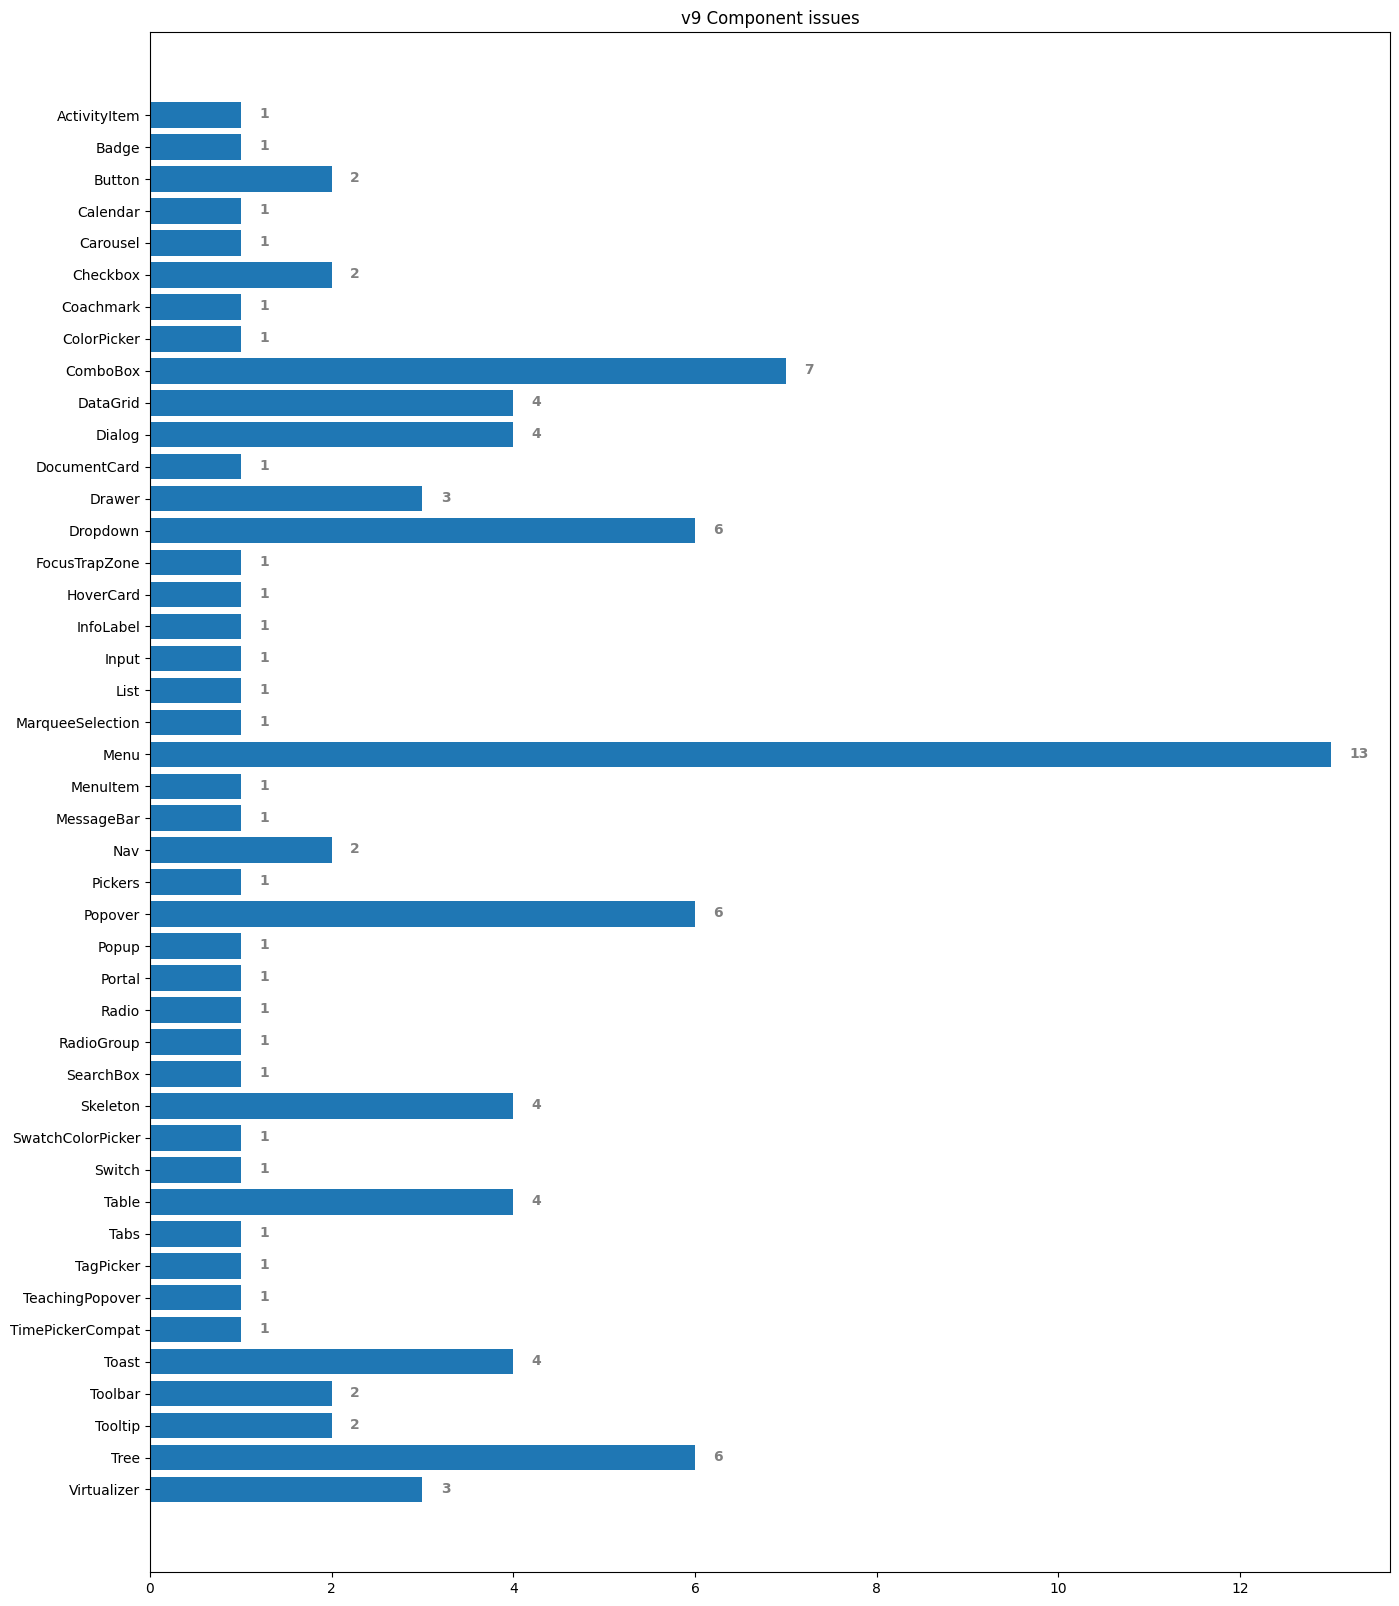

In [15]:
labels_counter = Counter()

for labels in issue_labels:
    for label in labels:
        labels_counter.update([label])

components_counters = {
    k: v for k, v in labels_counter.items() if k.startswith("Component:")
}
sorted_components_counters = dict(
    sorted(components_counters.items(), key=lambda item: item[0])
)
labels = [
    key.replace("Component: ", "") for key in list(sorted_components_counters.keys())
]
values = list(sorted_components_counters.values())

fig, ax = plt.subplots(figsize=(16, 20))

ax.barh(labels, values)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(
        i.get_width() + 0.2,
        i.get_y() + 0.5,
        str(round((i.get_width()), 2)),
        fontsize=10,
        fontweight="bold",
        color="grey",
    )

# Add Plot Title
ax.set_title("v9 Component issues")

# Show Plot
plt.show()

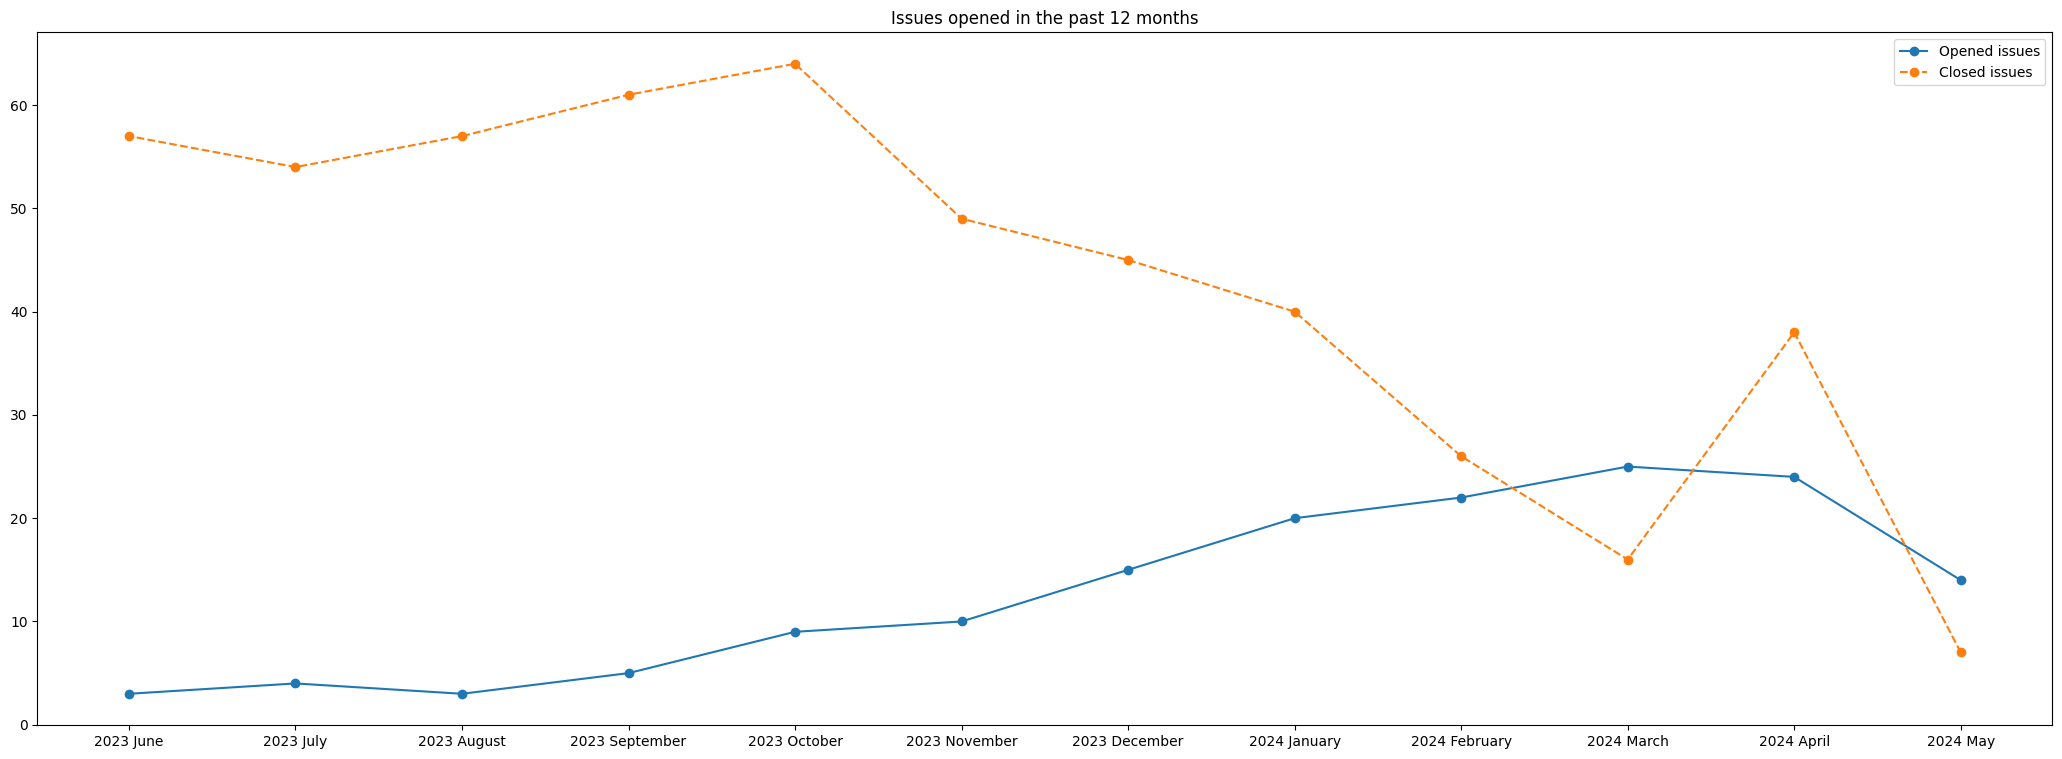

In [16]:
data = (
    df_issues.groupby(
        [df_issues["created_at"].dt.year, df_issues["created_at"].dt.month_name()],
        sort=False,
    )["labels"]
    .count()
    .head(12)
)

data_closed = (
    df_issues_closed.groupby(
        [
            df_issues_closed["created_at"].dt.year,
            df_issues_closed["created_at"].dt.month_name(),
        ],
        sort=False,
    )["labels"]
    .count()
    .head(12)
)

values = list(data.values)
labels = [f"{k[0]} {k[1]}" for k in list(data.index)]

closed_values = list(data_closed.values)
closed_labels = [f"{k[0]} {k[1]}" for k in list(data_closed.index)]

_, ax = plt.subplots(figsize=(26, 9))
ax.set_title("Issues opened in the past 12 months")
ax.invert_xaxis()

plt.plot(labels, values, label="Opened issues", linestyle="-", marker="o")
plt.plot(
    closed_labels, closed_values, label="Closed issues", linestyle="--", marker="o"
)

plt.legend()
plt.show()

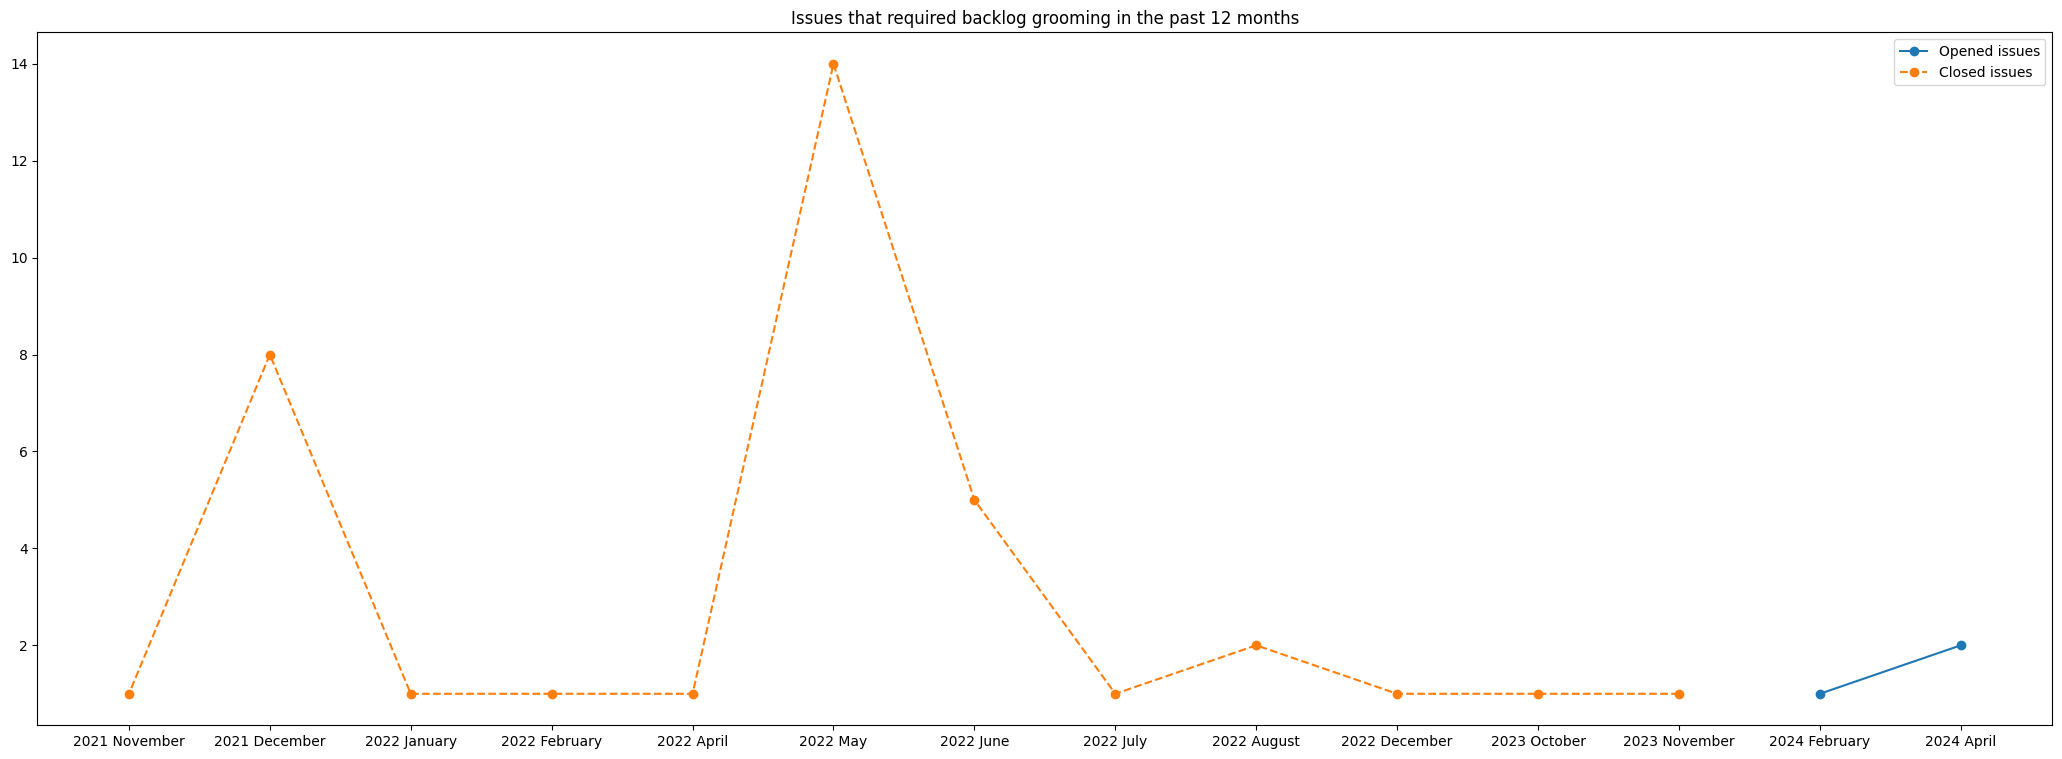

In [17]:
backlog_grooming_df = df_issues[df_issues["labels"].apply(lambda x: label_needs_backlog_grooming in x)].sort_values(by="created_at", ascending=False)
backlog_grooming_closed_df = df_issues_closed[df_issues_closed["labels"].apply(lambda x: label_needs_backlog_grooming in x)].sort_values(by="created_at", ascending=False)


data = (
    backlog_grooming_df.groupby(
        [backlog_grooming_df["created_at"].dt.year, backlog_grooming_df["created_at"].dt.month_name()],
        sort=False,
    )["labels"]
    .count()
    .head(12)
)

data_closed = (
    backlog_grooming_closed_df.groupby(
        [backlog_grooming_closed_df["created_at"].dt.year, backlog_grooming_closed_df["created_at"].dt.month_name()],
        sort=False,
    )["labels"]
    .count()
    .head(12)
)

values = list(data.values)
labels = [f"{k[0]} {k[1]}" for k in list(data.index)]

closed_values = list(data_closed.values)
closed_labels = [f"{k[0]} {k[1]}" for k in list(data_closed.index)]

_, ax = plt.subplots(figsize=(26, 9))
ax.set_title("Issues that required backlog grooming in the past 12 months")
ax.invert_xaxis()

plt.plot(labels, values, label="Opened issues", linestyle="-", marker="o")
plt.plot(
    closed_labels, closed_values, label="Closed issues", linestyle="--", marker="o"
)

plt.legend()
plt.show()

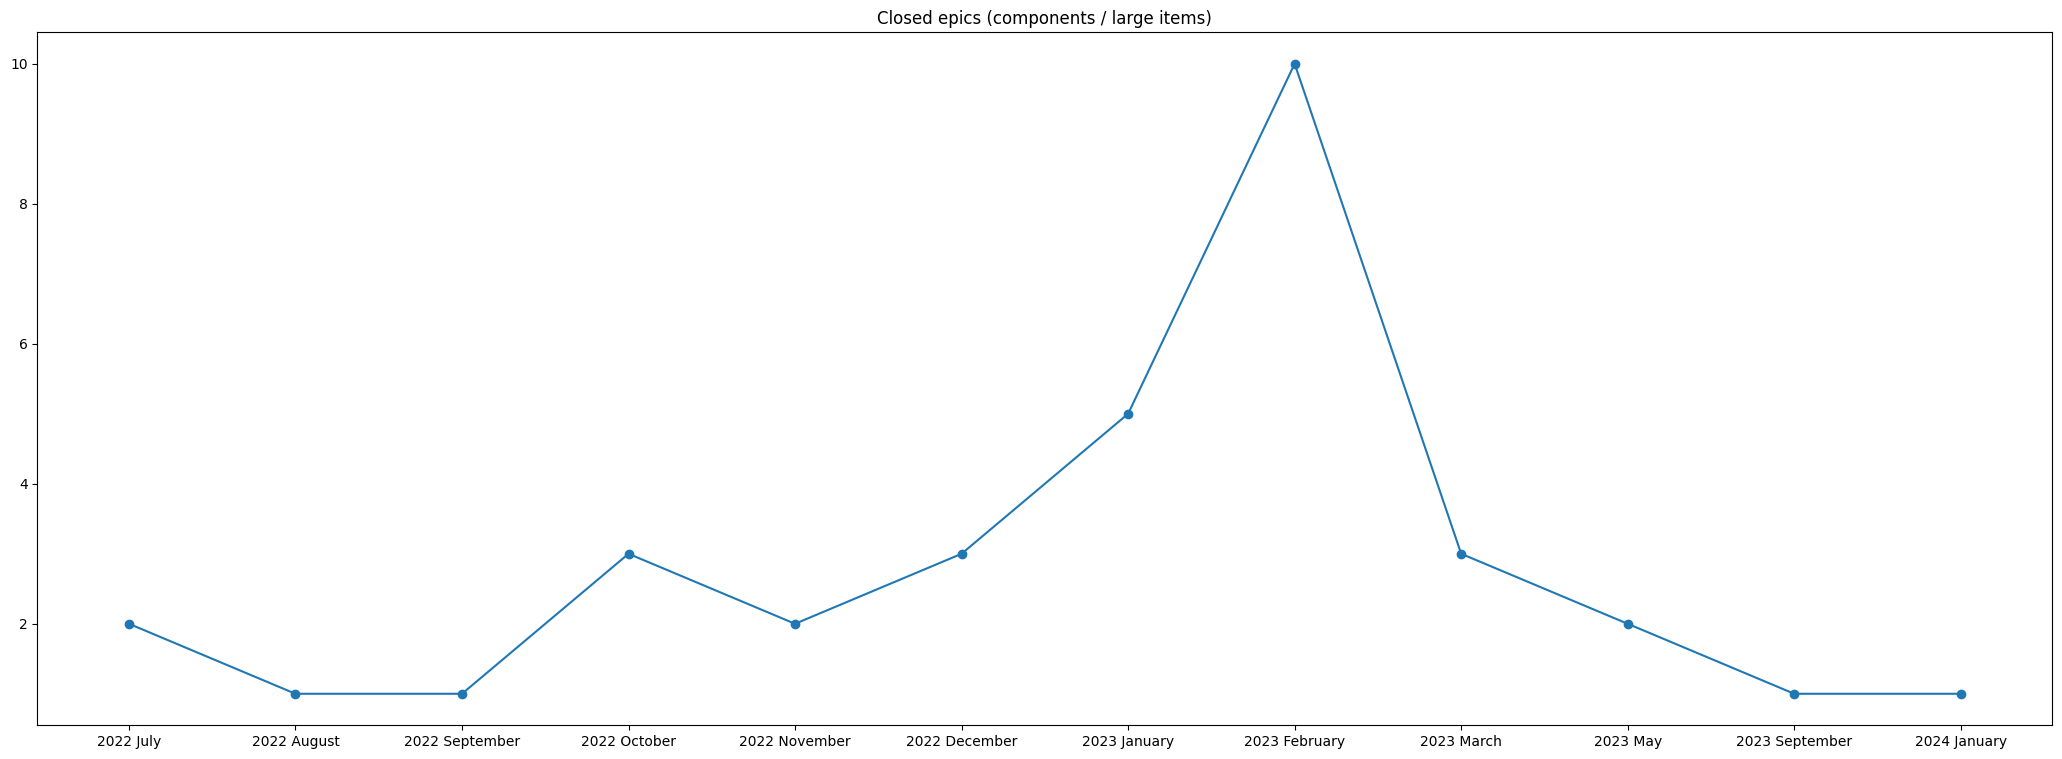

In [18]:
released_components_df = df_issues_closed[df_issues_closed["labels"].apply(lambda x: label_v9 in x and label_epic in x)].sort_values(by="created_at", ascending=False)

data = (
    released_components_df.groupby(
        [released_components_df["created_at"].dt.year, released_components_df["created_at"].dt.month_name()],
        sort=False,
    )["labels"]
    .count()
    .head(12)
)
values = list(data.values)
labels = [f"{k[0]} {k[1]}" for k in list(data.index)]

_, ax = plt.subplots(figsize=(26, 9))
ax.set_title("Closed epics (components / large items)")
ax.invert_xaxis()

plt.plot(labels, values, linestyle="-", marker="o")

plt.show()